In [1]:
import numpy as np
import os
import random
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from utils import *

2023-07-06 17:59:59.009736: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 18:00:00.042733: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
os.environ["PYTHONHASHSEED"] = "0"
random.seed(1234)
np.random.seed(1234)
tf.random.set_seed(1234)

In [3]:
folder_path = './points'

x, y = read_data(folder_path, people=["manuel", "joel"])
x_test, y_test = read_data(folder_path, people=["pedro"])

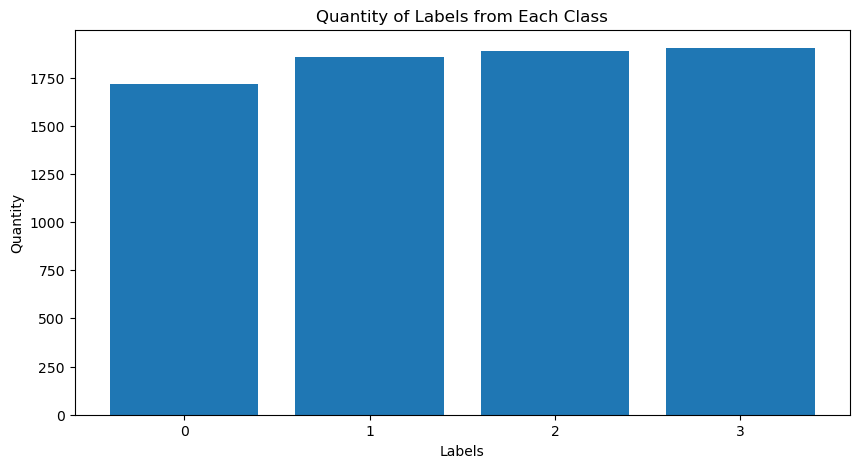

[0 1 2 3]
4


In [4]:
draw_bar_chart(y)

print(np.unique(y))

n_classes = len(np.unique(y))

print(n_classes)

In [5]:
# shuffle
x, y = shuffle(x, y, random_state=0)

# split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1/4, random_state=0, stratify=y, shuffle=True)

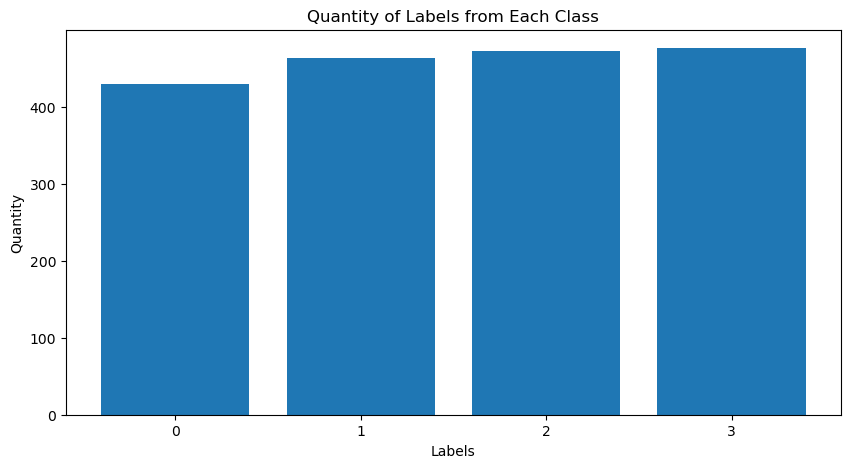

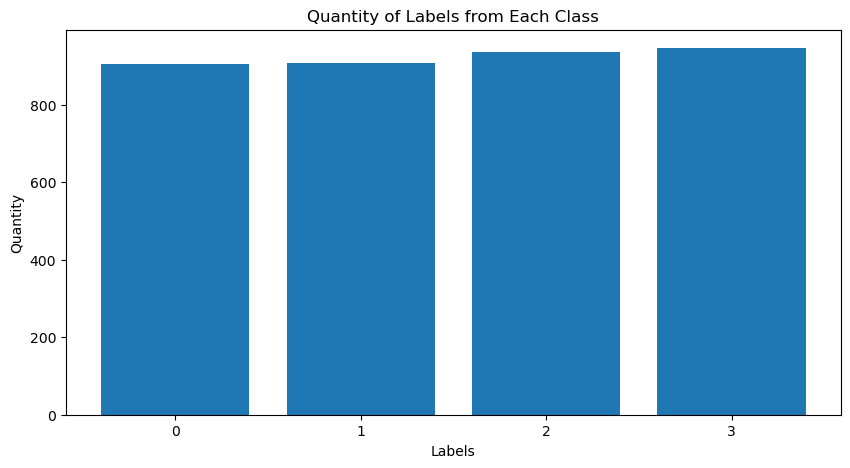

In [6]:
draw_bar_chart(y_val)
draw_bar_chart(y_test)

In [7]:
def create_model(input_shape, dropout=0.5, learning_rate=0.001, kernel_size=3, num_conv_layers=2):
   # Create a `Sequential` model and add a Dense layer as the first layer.
   model = tf.keras.models.Sequential()
   model.add(tf.keras.Input(shape=input_shape))
   for _ in range(num_conv_layers):
      model.add(tf.keras.layers.Conv1D(64, kernel_size, activation='relu'))
   #model.add(tf.keras.layers.MaxPooling1D(2,1))
   model.add(tf.keras.layers.Flatten())
   model.add(tf.keras.layers.Dropout(dropout))
   model.add(tf.keras.layers.Dense(128, activation='relu'))
   model.add(tf.keras.layers.Dropout(dropout))
   model.add(tf.keras.layers.Dense(32, activation='relu'))
   model.add(tf.keras.layers.Dense(n_classes, activation="softmax"))

   model.compile(
      loss="sparse_categorical_crossentropy",
      optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=["sparse_categorical_accuracy"]
   )
   return model

In [8]:
all_results = []

for _ in range(5):
    input_shape = x.shape[1:]

    model = create_model(input_shape)

    model.summary()

    callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

    results = model.fit(
        x_train,
        y_train,
        validation_data=(x_val,y_val),
        epochs=10000,
        batch_size=128,
        callbacks=callbacks,
    )

    model.evaluate(x_val, y_val, verbose=1)

    l, a = model.evaluate(x_test, y_test, verbose=1)

    all_results.append([l, a])

2023-07-06 18:00:04.048824: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-06 18:00:04.087325: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-06 18:00:04.087574: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 64)            640       
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            12352     
                                                                 
 flatten (Flatten)           (None, 1088)              0         
                                                                 
 dropout (Dropout)           (None, 1088)              0         
                                                                 
 dense (Dense)               (None, 128)               139392    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4

2023-07-06 18:00:07.455432: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-07-06 18:00:08.374802: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fc29000d740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-06 18:00:08.374867: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 960M, Compute Capability 5.0
2023-07-06 18:00:08.382136: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-06 18:00:08.561242: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


44/44 [==============================] - 6s 20ms/step - loss: 1.3412 - sparse_categorical_accuracy: 0.3371 - val_loss: 1.2276 - val_sparse_categorical_accuracy: 0.4739
Epoch 2/10000
44/44 [==============================] - 0s 7ms/step - loss: 1.2141 - sparse_categorical_accuracy: 0.4732 - val_loss: 1.1149 - val_sparse_categorical_accuracy: 0.4929
Epoch 3/10000
44/44 [==============================] - 0s 9ms/step - loss: 1.0935 - sparse_categorical_accuracy: 0.5297 - val_loss: 0.9686 - val_sparse_categorical_accuracy: 0.6158
Epoch 4/10000
44/44 [==============================] - 0s 7ms/step - loss: 0.9828 - sparse_categorical_accuracy: 0.5850 - val_loss: 0.8408 - val_sparse_categorical_accuracy: 0.6641
Epoch 5/10000
44/44 [==============================] - 0s 8ms/step - loss: 0.8923 - sparse_categorical_accuracy: 0.6304 - val_loss: 0.7258 - val_sparse_categorical_accuracy: 0.7505
Epoch 6/10000
44/44 [==============================] - 0s 8ms/step - loss: 0.8236 - sparse_categorical_accur

In [9]:
print(all_results)

[[1.8477160930633545, 0.5416892170906067], [2.1779415607452393, 0.5365457534790039], [1.9306946992874146, 0.5427720546722412], [1.998384714126587, 0.5362750291824341], [2.280900239944458, 0.5292366147041321]]


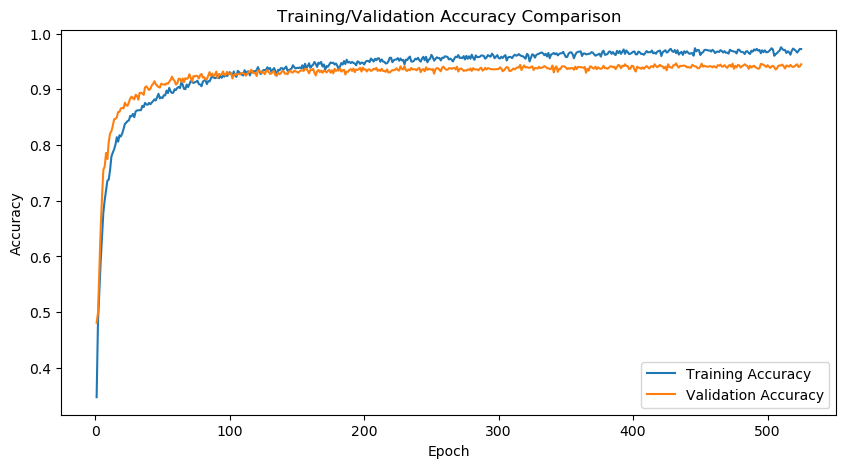

In [10]:
plot_accuracy_comparison([results.history["sparse_categorical_accuracy"], results.history["val_sparse_categorical_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"])

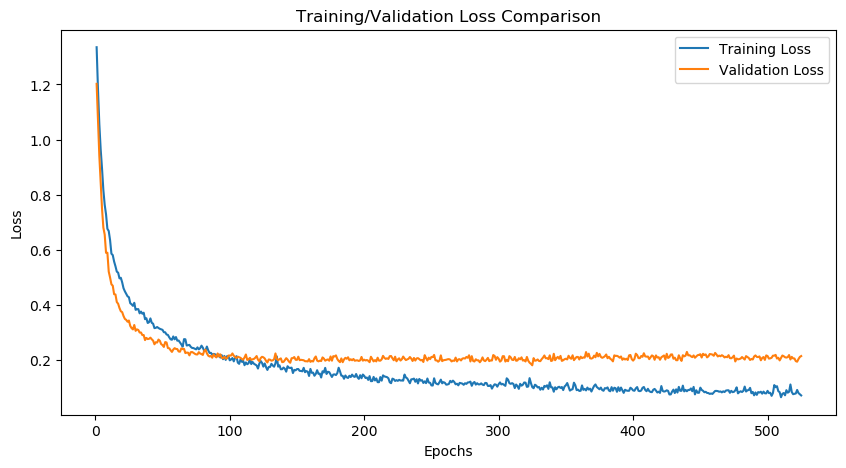

In [11]:
plot_loss_comparison([results.history["loss"], results.history["val_loss"]],
                     "Training/Validation Loss Comparison",
                     ["Training Loss", "Validation Loss"])

116/116 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.49      0.57      0.53       774
           1       0.69      0.46      0.55      1338
           2       0.37      0.40      0.39       857
           3       0.57      0.75      0.65       725

    accuracy                           0.53      3694
   macro avg       0.53      0.55      0.53      3694
weighted avg       0.55      0.53      0.53      3694



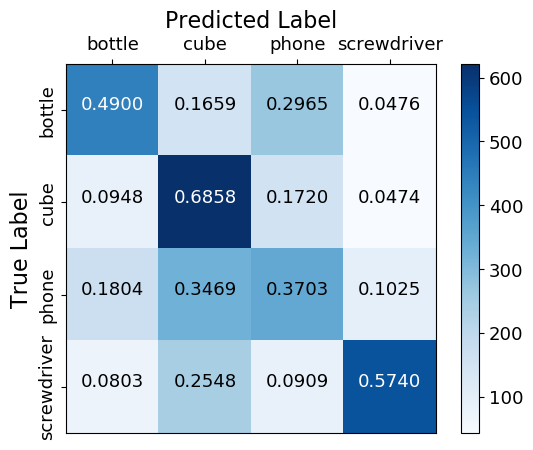

In [12]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_pred,y_test))
plot_confusion_matrix(y_test, y_pred, ["bottle", "cube", "phone", "screwdriver"])